# Reliability analysis with a model

In this example, we will demonstrate how to perform a reliability analysis using a model that is not a limit state function. We consider the critical head difference model developed by Sellmeijer. This model is applicable to the piping failure mechanism, which addresses backward internal erosion beneath dikes with predominantly horizontal seepage paths.

In this example, the limit state function is defined outside of the model. 

### Define model

First, let's import the necessary classes:

In [1]:
from probabilistic_library import ReliabilityProject, DistributionType, ReliabilityMethod, CompareType

The critical head difference, $H_c$, according to the Sellmeijer's model is described by the following equations:

$F_{resistance}=\eta\cdot \frac{\gamma_{sub,particles}}{\gamma_{water}}\cdot \tan \theta_{sellmeijer,rev}$


$F_{scale}=\frac{d_{70.m}}{\sqrt[3]{\kappa\cdot L}}\cdot\left(\frac{d_{70}}{d_{70.m}}\right)^{0.4}$ and $\kappa = \frac{\nu_{water}}{g}\cdot k$


$F_{geometry}=0.91\cdot \left(\frac{D}{L}\right)^{\frac{0.28}{\left(\frac{D}{L}\right)^{2.8}-1}+0.04}$

$H_c = F_{resistance} \cdot F_{scale} \cdot F_{geometry} \cdot L$

where: <br>
$L$ - seepage length (m) <br>
$D$ - thickness of upper sand layer (m) <br>
$\theta$ - bedding angle ($\circ$) <br>
$d_{70}$ - particle diameter (m) <br>
$k$ - permeability of the upper sand layer (m/s)

In [2]:
from utils.models import model_sellmeijer

### Perform reliability analysis

We create a project using the `ReliabilityProject()` class and reference Sellmeijer's model. Note that this model functions as a limit state function.

In [3]:
project = ReliabilityProject()
project.model = model_sellmeijer

project.model.print()

Model model_sellmeijer:
Input parameters:
  k
  L
  d70
  D
Output parameters:
  delta_h_c


We define all the input parameters of the model as log normal variables, all with variation coefficient of $0.25$:

In [4]:
project.variables["k"].distribution = DistributionType.log_normal
project.variables["k"].mean = 0.000245598
project.variables["k"].variation = 0.25

project.variables["L"].distribution = DistributionType.log_normal
project.variables["L"].mean = 40.0
project.variables["L"].variation = 0.25

project.variables["d70"].distribution = DistributionType.log_normal
project.variables["d70"].mean = 0.00019
project.variables["d70"].variation = 0.25

project.variables["D"].distribution = DistributionType.log_normal
project.variables["D"].mean = 30.0
project.variables["D"].variation = 0.25

Now, we specify the limit state function as follows: failure occurs when the head difference exceeds $3.0$ meters.
This can be expressed as.

In [5]:
project.limit_state_function.parameter = project.model.output_parameters[0]
project.limit_state_function.compare_type = CompareType.greater_than
project.limit_state_function.critical_value = 3.0

We use the `crude_monte_carlo` method and define the relevant settings: `minimum_samples` and `maximum_samples`. The reliability analysis is performed using `project.run()`, and the results can be accessed from `project.design_point`.

Reliability:
 Reliability index = 1.0669
 Probability of failure = 0.143
 Convergence = 0.0547 (not converged)
 Model runs = 2001
Alpha values:
 k: alpha = 0.2634, x = 0.0002
 L: alpha = -0.8719, x = 48.7939
 d70: alpha = -0.3819, x = 0.0002
 D: alpha = 0.157, x = 27.9284



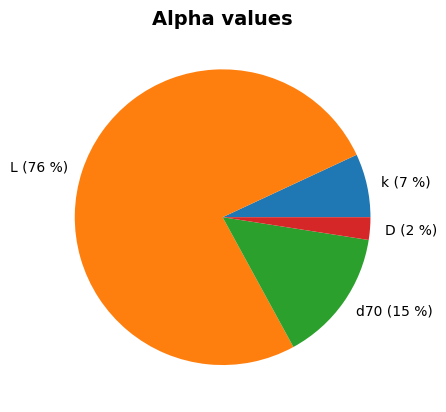

In [6]:
project.settings.reliability_method = ReliabilityMethod.crude_monte_carlo
project.settings.minimum_samples = 1000
project.settings.maximum_samples = 2000

project.run()

project.design_point.print()
project.design_point.plot_alphas()